In [1]:
%matplotlib inline
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [3]:
# LOAD THE DATASET
data = pd.read_csv('Student at Risk Assessment system.csv')

In [4]:
data.head()

,Timestamp,Gender,Age [10-15],Age [16-20],Age [21-25],Age [26-30],Age [31-35],Level,"I have access to material such as books internet, tutorials needed to succeed in my academy",My family financial status allows me to focus on my academic without stress,...,"I rarely have conflict with my classmate, lecturer or non-academic staff members.",I constantly attend lectures on time,I avoid engaging in risky behavior e.g. skipping classes or use of harmful substance,My family status is stable and supportive in my academic pursuits,My parent and guardian encourages me on my academic pursuit,There are no significant family issues that interfere my academic pursuit,I have a strong sense of belonging in my university community,I believe the University provide adequate support that assist me to be successful in my academic pursuit,I feel save and comfortable in my school environment,What is your current CGPA
0,2024/12/20 4:48:49 PM GMT+1,Male,Column 1,Column 1,Column 1,Column 1,Column 1,200L,Agreed,Disagreed,...,Not Frequently,Neutral,neutral,Stable,Neutral,Agree,little sense of belonging,Neutral,Agree,3.5 to 4.49
1,2024/12/20 4:51:18 PM GMT+1,Female,Column 1,Column 1,Column 1,Column 1,Column 1,400L,Neutral,Neural,...,Not at All,Agree,more frequetly,Stable,Agree,Agree,Neutral,Litle Support,Neutral,3.5 to 4.49
2,2024/12/20 5:03:18 PM GMT+1,Female,Column 1,Column 1,Column 1,Column 1,Column 1,300L,Neutral,Neural,...,Not at All,Agree,not frequetly,very stable,Strongly agree,Neutral,little sense of belonging,Neutral,Neutral,2.5 to 3.49
3,2024/12/20 5:13:43 PM GMT+1,Male,Column 1,Column 1,Column 1,Column 1,Column 1,300L,Neutral,Disagreed,...,Neutral,Neutral,neutral,Neutral,Neutral,Neutral,little sense of belonging,Neutral,Neutral,3.5 to 4.49
4,2024/12/20 5:23:48 PM GMT+1,Female,Column 1,Column 1,Column 1,Column 1,Column 1,200L,Agreed,Agreed,...,Not Frequently,Strongly disagree,more frequetly,Stable,Agree,Agree,Strong sense of belonging,Litle Support,Agree,3.5 to 4.49


In [5]:
data = data.drop([0,1,2,3,4,5,6,7,8,9])

In [6]:
data['Age [10-15]']=data['Age [10-15]'].fillna(0).replace('Column 1',1)
data['Age [16-20]']=data['Age [16-20]'].fillna(0).replace('Column 1',1)
data['Age [21-25]']=data['Age [21-25]'].fillna(0).replace('Column 1',1)
data['Age [26-30]']=data['Age [26-30]'].fillna(0).replace('Column 1',1)
data['Age [31-35]']=data['Age [31-35]'].fillna(0).replace('Column 1',1)

In [7]:
data.head()

,Timestamp,Gender,Age [10-15],Age [16-20],Age [21-25],Age [26-30],Age [31-35],Level,"I have access to material such as books internet, tutorials needed to succeed in my academy",My family financial status allows me to focus on my academic without stress,...,"I rarely have conflict with my classmate, lecturer or non-academic staff members.",I constantly attend lectures on time,I avoid engaging in risky behavior e.g. skipping classes or use of harmful substance,My family status is stable and supportive in my academic pursuits,My parent and guardian encourages me on my academic pursuit,There are no significant family issues that interfere my academic pursuit,I have a strong sense of belonging in my university community,I believe the University provide adequate support that assist me to be successful in my academic pursuit,I feel save and comfortable in my school environment,What is your current CGPA
10,2024/12/21 8:00:23 PM GMT+1,Male,0,0,0,0,1,500L,Strongly Agreed,Agreed,...,Not at All,Strongly agree,frequently,Stable,Neutral,Disagree,Strong sense of belonging,Litle Support,Neutral,3.5 to 4.49
11,2024/12/21 8:41:22 PM GMT+1,Male,0,0,1,0,0,400L,Strongly Agreed,Agreed,...,Not at All,Strongly agree,more frequetly,Stable,Agree,Agree,Strong sense of belonging,Neutral,Neutral,3.5 to 4.49
12,2024/12/21 8:41:57 PM GMT+1,Male,0,0,1,0,0,200L,Strongly Disagree,Strongly Disagreed,...,Most frequently,Strongly disagree,more frequetly,Stable,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,4.5 and above
13,2024/12/21 8:42:40 PM GMT+1,Male,0,1,0,0,0,300L,Strongly Agreed,Strongly Agreed,...,Not Frequently,Strongly agree,more frequetly,very stable,Strongly agree,Strongly agree,Worst Sense of belonging,No support,Strongly disagree,2.5 to 3.49
14,2024/12/21 8:45:07 PM GMT+1,Male,0,0,1,0,0,400L,Disagree,Neural,...,Not Frequently,Agree,not frequetly,Stable,Strongly agree,Strongly disagree,Strong sense of belonging,No support,Neutral,2.5 to 3.49


In [8]:
# Rename the column
data = data.rename(columns={
    'I have access to material such as books internet, tutorials needed to succeed in my academy ': 'Access_to_materials',
    'My family financial status allows me to focus on my academic without stress':'Family_financial_status_good',
    'My parent or guardian actively  support my education and learning':'Parent_Guardian_Support_Education',
    'I have at least one closed friend who I can rely on':'I_Have_One_Reliable_Friend',
    'I have positive and supportive relation with my lecturers':'Positive_Supportive_Rel_Lecturers',
    'I rarely have conflict with my classmate, lecturer or non-academic staff members.':'Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff',
    'I constantly attend lectures on time':'Constantly_Attend_Lectures_on_Time',
    'I avoid engaging in risky behavior e.g. skipping classes or use of harmful substance':'Avoid_Risky_Behaiviour',
    'My family status is stable and supportive in my academic pursuits':'Stable_Supportive_Family_Status_Supports_Education',
    'My parent and guardian encourages me on my academic pursuit ':'Parent_Guardian_Encourages_Academic_Pursuit',
    'There are no significant family issues that interfere my academic pursuit ':'No_Significant_Family_Issues_interfere_With_education',
    'I have a strong sense of belonging in my university community':'Strong_Sense_of_Coummunity_University',
    'I believe the University provide adequate support that assist me to be successful in my academic pursuit':'Uni_Provides_Adequate_support',
    'I feel save and comfortable in my school environment':'Feel_Safe_Comfortable_School_Environ',
    'What is your current CGPA':'Your_CGPA'
})

# Verify the change
print(data.columns)

Index(['Timestamp', 'Gender', 'Age [10-15]', 'Age [16-20]', 'Age [21-25]',
       'Age [26-30]', 'Age [31-35]', 'Level', 'Access_to_materials',
       'Family_financial_status_good', 'Parent_Guardian_Support_Education',
       'I feel supported and accepted by my course mate and friends ',
       'I_Have_One_Reliable_Friend', 'Positive_Supportive_Rel_Lecturers',
       'Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff',
       'Constantly_Attend_Lectures_on_Time', 'Avoid_Risky_Behaiviour',
       'Stable_Supportive_Family_Status_Supports_Education',
       'Parent_Guardian_Encourages_Academic_Pursuit',
       'No_Significant_Family_Issues_interfere_With_education',
       'Strong_Sense_of_Coummunity_University',
       'Uni_Provides_Adequate_support', 'Feel_Safe_Comfortable_School_Environ',
       'Your_CGPA'],
      dtype='object')


In [9]:
response = {
    'Strongly Agreed': 4,
    'Strongly agree': 4,
    'Agreed': 3, 
    'Agree': 3, 
    'Neutral': 2, 
    'neutral':2,
    'Disagree': 1, 
    'Strongly Disagree': 0,
    'Strongly disagree': 0,
    'very stable': 4,
    'Stable': 3,
    'Not stable': 1,
    'Not very stable': 0,
    'more frequently': 4,
    'Most frequently': 4,
    'frequently': 3,
    'Not Frequently': 1,
    'not frequently': 1,
    'Not at All': 0,
    'not more frequently': 0,
    'less than 2.0': 4,
    '2.0 to 2.49': 3,
    '2.5 to 3.49': 2,
    '3.5 to 4.49': 1,
    '4.5 and above': 0,
    'Strong Support': 4,
    'Little Support':3,
    'Bad support':1,
    'No support':0,
    'Strong sense of belonging':4,
    'Little sesnse of belonging':3,
    'No sense of belonging':1,
    'Worst Sense of belonging':0
}
# Create new columns with mapped numerical representations
data['access_to_materials_enc'] = data['Access_to_materials'].map(response)
data['Family_financial_status_good_enc'] = data['Family_financial_status_good'].map(response)
data['Parent_Guardian_Support_Education_enc'] = data['Parent_Guardian_Support_Education'].map(response)
data['I_Have_One_Reliable_Friend_enc'] = data['I_Have_One_Reliable_Friend'].map(response)
data['Positive_Supportive_Rel_Lecturers_enc'] = data['Positive_Supportive_Rel_Lecturers'].map(response)
data['Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff_enc'] = data['Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff'].map(response)
data['Constantly_Attend_Lectures_on_Time_enc'] = data['Constantly_Attend_Lectures_on_Time'].map(response)
data['Avoid_Risky_Behaiviour_enc'] = data['Avoid_Risky_Behaiviour'].map(response)
data['Stable_Supportive_Family_Status_Supports_Education_enc'] = data['Stable_Supportive_Family_Status_Supports_Education'].map(response)
data['Parent_Guardian_Encourages_Academic_Pursuit_enc'] = data['Parent_Guardian_Encourages_Academic_Pursuit'].map(response)
data['No_Significant_Family_Issues_interfere_With_education_enc'] = data['No_Significant_Family_Issues_interfere_With_education'].map(response)
data['Strong_Sense_of_Coummunity_University_enc'] = data['Strong_Sense_of_Coummunity_University'].map(response)
data['Uni_Provides_Adequate_support_enc'] = data['Uni_Provides_Adequate_support'].map(response)
data['Feel_Safe_Comfortable_School_Environ_enc'] = data['Feel_Safe_Comfortable_School_Environ'].map(response)
data['Your_CGPA_enc'] = data['Your_CGPA'].map(response)


In [10]:
# One-hot encoding for 'gender' column
gender_enc = pd.get_dummies(data['Gender'])

# One-hot encoding for 'level' column
level_enc = pd.get_dummies(data['Level'])

# Adding the one-hot encoded columns to the original dataset
data = pd.concat([data, gender_enc, level_enc], axis=1)

In [11]:
data.head()

,Timestamp,Gender,Age [10-15],Age [16-20],Age [21-25],Age [26-30],Age [31-35],Level,Access_to_materials,Family_financial_status_good,...,Strong_Sense_of_Coummunity_University_enc,Uni_Provides_Adequate_support_enc,Feel_Safe_Comfortable_School_Environ_enc,Your_CGPA_enc,Female,Male,200L,300L,400L,500L
10,2024/12/21 8:00:23 PM GMT+1,Male,0,0,0,0,1,500L,Strongly Agreed,Agreed,...,4.0,NaN,2.0,1.0,0,1,0,0,0,1
11,2024/12/21 8:41:22 PM GMT+1,Male,0,0,1,0,0,400L,Strongly Agreed,Agreed,...,4.0,2.0,2.0,1.0,0,1,0,0,1,0
12,2024/12/21 8:41:57 PM GMT+1,Male,0,0,1,0,0,200L,Strongly Disagree,Strongly Disagreed,...,2.0,2.0,2.0,0.0,0,1,1,0,0,0
13,2024/12/21 8:42:40 PM GMT+1,Male,0,1,0,0,0,300L,Strongly Agreed,Strongly Agreed,...,0.0,0.0,0.0,2.0,0,1,0,1,0,0
14,2024/12/21 8:45:07 PM GMT+1,Male,0,0,1,0,0,400L,Disagree,Neural,...,4.0,0.0,2.0,2.0,0,1,0,0,1,0


In [12]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()

Timestamp                                                       0
Gender                                                          0
Age [10-15]                                                     0
Age [16-20]                                                     0
Age [21-25]                                                     0
Age [26-30]                                                     0
Age [31-35]                                                     0
Level                                                           0
Access_to_materials                                             0
Family_financial_status_good                                    0
Parent_Guardian_Support_Education                               0
I feel supported and accepted by my course mate and friends     0
I_Have_One_Reliable_Friend                                      0
Positive_Supportive_Rel_Lecturers                               0
Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff                 0
Constantly

In [13]:
data = data.drop_duplicates()
len(data)

310

In [156]:
data = data.drop(columns=['Gender', 'Age [10-15]', 'Age [16-20]', 'Age [21-25]',
       'Age [26-30]', 'Age [31-35]', 'Level', 'Access_to_materials',
       'Family_financial_status_good', 'Parent_Guardian_Support_Education',
       'I feel supported and accepted by my course mate and friends ',
       'I_Have_One_Reliable_Friend', 'Positive_Supportive_Rel_Lecturers',
       'Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff',
       'Constantly_Attend_Lectures_on_Time', 'Avoid_Risky_Behaiviour',
       'Stable_Supportive_Family_Status_Supports_Education',
       'Parent_Guardian_Encourages_Academic_Pursuit',
       'No_Significant_Family_Issues_interfere_With_education',
       'Strong_Sense_of_Coummunity_University',
       'Uni_Provides_Adequate_support', 'Feel_Safe_Comfortable_School_Environ',
       'Your_CGPA'])


In [157]:
data.to_csv('student_at_risk_encoded.csv', index=False)

In [189]:
encoded_data = pd.read_csv('student_at_risk_encoded.csv')

In [168]:
def custom_scale_data(encoded_data):
    """
    Custom scaling function that applies different scaling approaches to
    year levels and Likert scale items, with weighted scaling for critical indicators.
    """
    # Drop timestamp
    encoded_data = encoded_data.drop(columns=['Timestamp'])
    
    # Separate year level indicators from other features
    year_level_cols = ['200L', '300L', '400L', '500L']
    likert_cols = [col for col in encoded_data.columns if col not in year_level_cols]
    
    # Create year level risk weights (higher years = lower risk)
    year_level_weights = {
        '200L': 1.0,  
        '300L': 0.7,
        '400L': 0.4,
        '500L': 0.2   
    }
    
    # Apply year level weights
    year_level_data = encoded_data[year_level_cols].copy()
    for col in year_level_cols:
        year_level_data[col] = year_level_data[col] * year_level_weights[col]
    
    # Define critical indicators and their weights
    critical_indicators = {
        'Family_financial_status_good_enc': 1.5,
        'Parent_Guardian_Support_Education_enc': 1.5,
        'access_to_materials_enc': 1.3,
        'Constantly_Attend_Lectures_on_Time_enc': 1.2,
        'Your_CGPA_enc': 1.4,
        'Feel_Safe_Comfortable_School_Environ_enc': 1.2
    }
    
    # Scale Likert scale items
    likert_data = encoded_data[likert_cols].copy()
    scaler = StandardScaler()
    scaled_likert_data = scaler.fit_transform(likert_data)
    scaled_likert_df = pd.DataFrame(scaled_likert_data, columns=likert_cols)
    
    # Apply weights to critical indicators
    for indicator, weight in critical_indicators.items():
        if indicator in scaled_likert_df.columns:
            scaled_likert_df[indicator] = scaled_likert_df[indicator] * weight
    
    # Combine scaled data
    final_scaled_data = pd.concat([scaled_likert_df, year_level_data], axis=1)
    
    return final_scaled_data

# Usage
scaled_data = custom_scale_data(encoded_data)


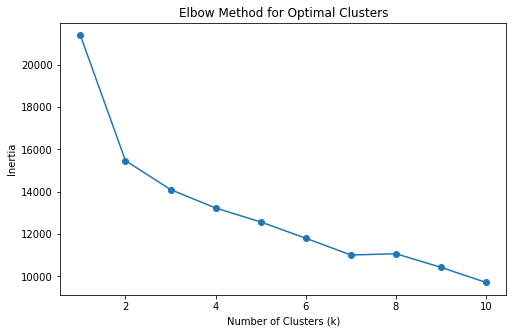

In [169]:
# Determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [174]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
encoded_data['Cluster'] = clusters
data['Cluster'] = clusters

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


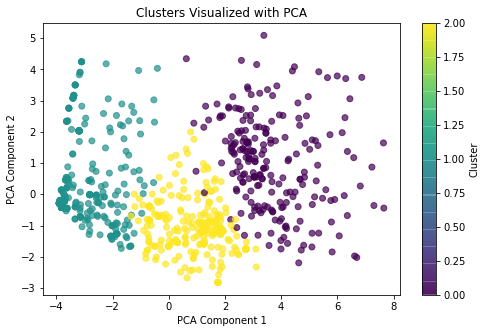

In [171]:
# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [172]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=encoded_data.columns[:-1])  # Exclude the 'Cluster' column
print(centroid_df)

   Timestamp  access_to_materials_enc  Family_financial_status_good_enc  \
0  -0.861005                -1.073272                         -1.538156   
1   0.960479                 1.548595                          1.075293   
2  -0.504146                -1.045123                         -0.140893   

   Parent_Guardian_Support_Education_enc  I_Have_One_Reliable_Friend_enc  \
0                              -0.540140                       -0.504124   
1                               0.745462                        0.692437   
2                              -0.485776                       -0.449450   

   Positive_Supportive_Rel_Lecturers_enc  \
0                               0.380427   
1                              -0.119268   
2                              -0.139123   

   Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff_enc  \
0                                          -0.977477     
1                                           0.759356     
2                                          

<AxesSubplot:xlabel='Cluster'>

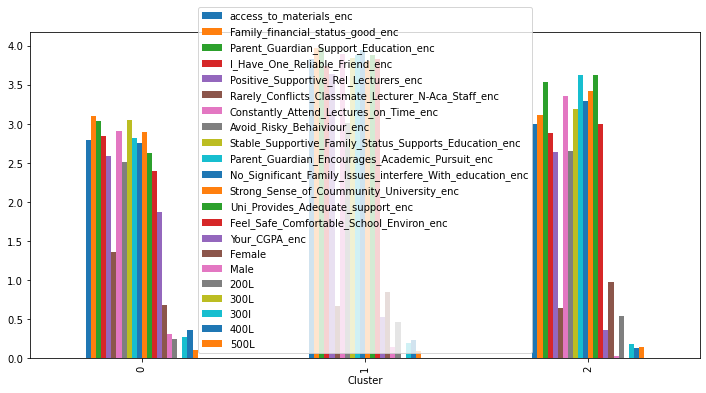

In [173]:
cluster_summary = encoded_data.groupby('Cluster').mean()
cluster_summary.plot(kind='bar', figsize=(12, 6))

# Cluster Analysis Interpretation

#### Transitional Support Group Cluster 0 (Moderate Risk)

Moderate values (2.5-3.0) across most support and engagement features
Notable characteristics:

- Consistent access to materials
- Moderate family financial status
- Reasonable parent/guardian support
- Some reliable friendships
- Lower year level representation


Key insight: These students have basic support systems but might need additional monitoring

#### Active Intervention Group Cluster 1 (High Risk)

Significantly lower values across almost all features (mostly below 1.0)
Critical observations:

- Minimal support systems
- Low engagement levels
- Poor access to resources
- Lower attendance rates
- Minimal family support

Key insight: These students require immediate intervention and support

#### Self-Sustaining Group Cluster 2 (Low Risk)

Highest values (3.0-3.5) across most positive indicators
Strong characteristics:

- High access to materials
- Strong family financial status
- Excellent parent/guardian support
- Strong university support
- Better representation in higher year levels

Key insight: These students show strong resilience factors

In [178]:
data.to_csv('student_at_risk_data_cluster.csv', index=False)

In [194]:
def custom_scale_data(encoded_data):
    """
    Custom scaling function that applies different scaling approaches to
    year levels and Likert scale items, with weighted scaling for critical indicators.
    """
    # Drop timestamp
    encoded_data = encoded_data.drop(columns=['Timestamp'])
    
    # Separate year level indicators from other features
    year_level_cols = ['200L', '300L', '400L', '500L']
    likert_cols = [col for col in encoded_data.columns if col not in year_level_cols]
    
    # Create year level risk weights (higher years = lower risk)
    year_level_weights = {
        '200L': 1.0,  
        '300L': 0.7,
        '400L': 0.4,
        '500L': 0.2   
    }
    
    # Apply year level weights
    year_level_data = encoded_data[year_level_cols].copy()
    for col in year_level_cols:
        year_level_data[col] = year_level_data[col] * year_level_weights[col]
    
    # Define critical indicators and their weights
    critical_indicators = {
        'Family_financial_status_good_enc': 1.5,
        'Parent_Guardian_Support_Education_enc': 1.5,
        'access_to_materials_enc': 1.3,
        'Constantly_Attend_Lectures_on_Time_enc': 1.2,
        'Your_CGPA_enc': 1.4,
        'Feel_Safe_Comfortable_School_Environ_enc': 1.2
    }
    
    # Scale Likert scale items
    likert_data = encoded_data[likert_cols].copy()
    scaler = StandardScaler()
    scaled_likert_data = scaler.fit_transform(likert_data)
    scaled_likert_df = pd.DataFrame(scaled_likert_data, columns=likert_cols)
    
    # Apply weights to critical indicators
    for indicator, weight in critical_indicators.items():
        if indicator in scaled_likert_df.columns:
            scaled_likert_df[indicator] = scaled_likert_df[indicator] * weight
    
    # Combine scaled data
    final_scaled_data = pd.concat([scaled_likert_df, year_level_data], axis=1)
    
    return final_scaled_data

# Usage
scaled_data = custom_scale_data(encoded_data)

# Determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
encoded_data['Cluster'] = clusters
data['Cluster'] = clusters

cluster_summary = encoded_data.groupby('Cluster').mean()
cluster_summary.plot(kind='bar', figsize=(12, 6))


class StudentRiskPredictor:
    def __init__(self):
        self.rf_model = None
        self.dt_model = None
        self.scaler = None
        self.feature_names = None
        
    def preprocess_data(self, data_path):
        """
        Preprocess the student data for risk analysis.
        Performs cleaning, renaming, encoding, and feature selection.

        Args:
            data_path (str): Path to the raw CSV dataset.

        Returns:
            pd.DataFrame: Preprocessed data ready for scaling and modeling.
        """
        # Load the dataset
        data = pd.read_csv(data_path)

        # Drop initial irrelevant rows
        data = data.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

        # Fill and replace age group columns
        age_columns = ['Age [10-15]', 'Age [16-20]', 'Age [21-25]', 'Age [26-30]', 'Age [31-35]']
        for col in age_columns:
            data[col] = data[col].fillna(0).replace('Column 1', 1)

        # Rename columns
        rename_columns = {
            'I have access to material such as books internet, tutorials needed to succeed in my academy ': 'Access_to_materials',
            'My family financial status allows me to focus on my academic without stress': 'Family_financial_status_good',
            'My parent or guardian actively  support my education and learning': 'Parent_Guardian_Support_Education',
            'I have at least one closed friend who I can rely on': 'I_Have_One_Reliable_Friend',
            'I have positive and supportive relation with my lecturers': 'Positive_Supportive_Rel_Lecturers',
            'I rarely have conflict with my classmate, lecturer or non-academic staff members.': 'Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff',
            'I constantly attend lectures on time': 'Constantly_Attend_Lectures_on_Time',
            'I avoid engaging in risky behavior e.g. skipping classes or use of harmful substance': 'Avoid_Risky_Behaiviour',
            'My family status is stable and supportive in my academic pursuits': 'Stable_Supportive_Family_Status_Supports_Education',
            'My parent and guardian encourages me on my academic pursuit ': 'Parent_Guardian_Encourages_Academic_Pursuit',
            'There are no significant family issues that interfere my academic pursuit ': 'No_Significant_Family_Issues_interfere_With_education',
            'I have a strong sense of belonging in my university community': 'Strong_Sense_of_Coummunity_University',
            'I believe the University provide adequate support that assist me to be successful in my academic pursuit': 'Uni_Provides_Adequate_support',
            'I feel save and comfortable in my school environment': 'Feel_Safe_Comfortable_School_Environ',
            'What is your current CGPA': 'Your_CGPA'
        }
        data = data.rename(columns=rename_columns)

        # Map responses to numerical values
        response_mapping = {
            'Strongly Agreed': 4, 'Strongly agree': 4, 'Agreed': 3, 'Agree': 3,
            'Neutral': 2, 'neutral': 2, 'Disagree': 1, 'Strongly Disagree': 0,
            'Strongly disagree': 0, 'very stable': 4, 'Stable': 3, 'Not stable': 1,
            'Not very stable': 0, 'more frequently': 4, 'Most frequently': 4,
            'frequently': 3, 'Not Frequently': 1, 'not frequently': 1, 'Not at All': 0,
            'not more frequently': 0, 'less than 2.0': 4, '2.0 to 2.49': 3,
            '2.5 to 3.49': 2, '3.5 to 4.49': 1, '4.5 and above': 0, 'Strong Support': 4,
            'Little Support': 3, 'Bad support': 1, 'No support': 0,
            'Strong sense of belonging': 4, 'Little sesnse of belonging': 3,
            'No sense of belonging': 1, 'Worst Sense of belonging': 0
        }
        encoded_columns = [
            'Access_to_materials', 'Family_financial_status_good', 'Parent_Guardian_Support_Education',
            'I_Have_One_Reliable_Friend', 'Positive_Supportive_Rel_Lecturers',
            'Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff', 'Constantly_Attend_Lectures_on_Time',
            'Avoid_Risky_Behaiviour', 'Stable_Supportive_Family_Status_Supports_Education',
            'Parent_Guardian_Encourages_Academic_Pursuit', 'No_Significant_Family_Issues_interfere_With_education',
            'Strong_Sense_of_Coummunity_University', 'Uni_Provides_Adequate_support',
            'Feel_Safe_Comfortable_School_Environ', 'Your_CGPA'
        ]
        for col in encoded_columns:
            data[f"{col}_enc"] = data[col].map(response_mapping)

        # One-hot encode 'Gender' and 'Level'
        gender_enc = pd.get_dummies(data['Gender'], prefix='Gender')
        level_enc = pd.get_dummies(data['Level'], prefix='Level')
        data = pd.concat([data, gender_enc, level_enc], axis=1)

        # Drop unused columns
        drop_columns = age_columns + ['Gender', 'Level'] + encoded_columns
        data = data.drop(columns=drop_columns)

        # Drop duplicates and NaN values
        data = data.dropna().drop_duplicates()

        return data

        
    def build_models(self, data_path):
        """
        Build and train both Random Forest and Decision Tree models using custom scaling
        """
        # Load the data
        dtf = pd.read_csv(data_path)
        
        # Apply our custom scaling to the features
        X = custom_scale_data(dtf)
        self.feature_names = X.columns
        
        # Get the target variable (clusters)
        y = dtf['Cluster']
        
        # Replace cluster numbers with meaningful names
        cluster_names = {
            0: 'Transitional_Support',
            1: 'Active_Intervention',
            2: 'Self_Sustaining'
        }
        y = y.map(cluster_names)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Train Random Forest
        self.rf_model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42
        )
        
        # Train Decision Tree
        self.dt_model = DecisionTreeClassifier(
            max_depth=5,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42
        )
        
        # Fit both models
        self.rf_model.fit(X_train, y_train)
        self.dt_model.fit(X_train, y_train)
        
        param_grid = {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [1, 2, 4]
        }

        grid_search_rf = GridSearchCV(self.rf_model, param_grid, cv=5)
        grid_search_rf.fit(X_train, y_train)
        self.rf_model = grid_search_rf.best_estimator_

        grid_search_dt = GridSearchCV(self.dt_model, param_grid, cv=5)
        grid_search_dt.fit(X_train, y_train)
        self.dt_model = grid_search_dt.best_estimator_

        # Make predictions
        rf_pred = self.rf_model.predict(X_test)
        dt_pred = self.dt_model.predict(X_test)
        
        # Calculate feature importance
        rf_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        dt_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.dt_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # Print evaluations
        print("\nRandom Forest Classification Report:")
        print(classification_report(y_test, rf_pred))
        
        print("\nDecision Tree Classification Report:")
        print(classification_report(y_test, dt_pred))
        
        # Cross-validation scores
        rf_cv_scores = cross_val_score(self.rf_model, X_train, y_train, cv=5)
        dt_cv_scores = cross_val_score(self.dt_model, X_train, y_train, cv=5)
        
        print("\nCross-validation scores:")
        print(f"Random Forest: {rf_cv_scores.mean():.3f} (+/- {rf_cv_scores.std() * 2:.3f})")
        print(f"Decision Tree: {dt_cv_scores.mean():.3f} (+/- {dt_cv_scores.std() * 2:.3f})")
        
        # Save models
        joblib.dump(self.rf_model, 'random_forest_model.joblib')
        joblib.dump(self.dt_model, 'decision_tree_model.joblib')
        
        return rf_importance, dt_importance
    
    
    def predict_student_risk(self, student_data, model_type='both'):
        """
        Predict risk level for new student data using specified model(s)
        """
        # Apply custom scaling to new data
        scaled_data = custom_scale_data(student_data)
        
        results = {}
        if model_type in ['rf', 'both']:
            rf_pred = self.rf_model.predict(scaled_data)
            rf_prob = self.rf_model.predict_proba(scaled_data)
            results['random_forest'] = {'prediction': rf_pred, 'probabilities': rf_prob}
            
        if model_type in ['dt', 'both']:
            dt_pred = self.dt_model.predict(scaled_data)
            dt_prob = self.dt_model.predict_proba(scaled_data)
            results['decision_tree'] = {'prediction': dt_pred, 'probabilities': dt_prob}
        
        return results

if __name__ == "__main__":
    # Initialize and train models
    predictor = StudentRiskPredictor()
    rf_importance, dt_importance = predictor.build_models('student_at_risk_data_cluster.csv')
    
    # Print top features from both models
    print("\nTop Important Features (Random Forest):")
    print(rf_importance.head(10))
    print("\nTop Important Features (Decision Tree):")
    print(dt_importance.head(10))
    
    # Example prediction for a new student
    new_student = pd.DataFrame({
        'Timestamp':['2024/12/21 8:00:23 PM GMT+1'],
        'access_to_materials_enc': [3],
        'Family_financial_status_good_enc': [2],
        'Parent_Guardian_Support_Education_enc': [4],
        'I_Have_One_Reliable_Friend_enc': [1],
        'Positive_Supportive_Rel_Lecturers_enc': [3],
        'Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff_enc': [2],
        'Constantly_Attend_Lectures_on_Time_enc': [4],
        'Avoid_Risky_Behaiviour_enc': [1],
        'Stable_Supportive_Family_Status_Supports_Education_enc': [3],
        'Parent_Guardian_Encourages_Academic_Pursuit_enc': [4],
        'No_Significant_Family_Issues_interfere_With_education_enc': [0],
        'Strong_Sense_of_Coummunity_University_enc': [2],
        'Uni_Provides_Adequate_support_enc': [3],
        'Feel_Safe_Comfortable_School_Environ_enc': [4],
        'Your_CGPA_enc': [2],
        'Female': [1],
        'Male':[ 0],
        '200L': [0],
        '300L': [1],
        '300l': [0],
        '400L': [0],
        '500L': [0],
        'Cluster':[2]
    })
    
    predictions = predictor.predict_student_risk(new_student, model_type='both')
    print("\nPredictions for new student:")
    print(predictions)


Random Forest Classification Report:
                      precision    recall  f1-score   support

 Active_Intervention       1.00      1.00      1.00        71
     Self_Sustaining       1.00      1.00      1.00        60
Transitional_Support       1.00      1.00      1.00        45

            accuracy                           1.00       176
           macro avg       1.00      1.00      1.00       176
        weighted avg       1.00      1.00      1.00       176


Decision Tree Classification Report:
                      precision    recall  f1-score   support

 Active_Intervention       1.00      1.00      1.00        71
     Self_Sustaining       1.00      1.00      1.00        60
Transitional_Support       1.00      1.00      1.00        45

            accuracy                           1.00       176
           macro avg       1.00      1.00      1.00       176
        weighted avg       1.00      1.00      1.00       176


Cross-validation scores:
Random Forest: 1.000 (+/


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        60

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



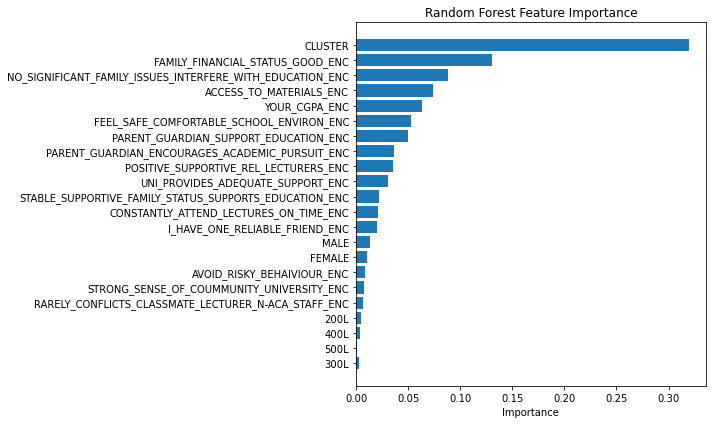


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        60

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



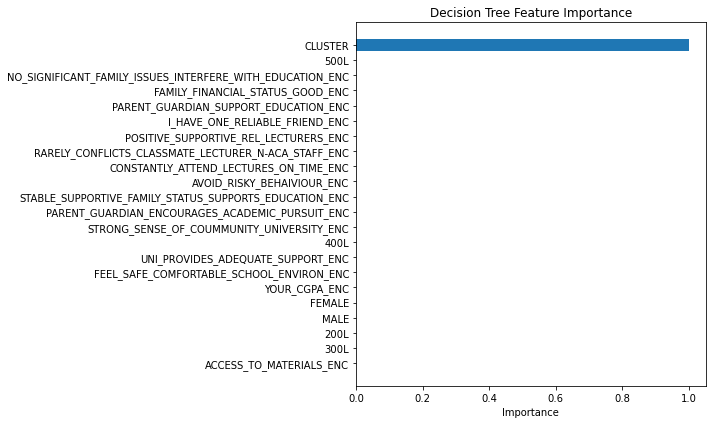

Error in prediction: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- CLUSTER


Predictions for new student:
None


In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, silhouette_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

class StudentRiskPredictor:
    def __init__(self):
        self.rf_model = None
        self.dt_model = None
        self.kmeans_model = None
        self.scaler = None
        self.feature_names = None
        
    def custom_scale_data(self, encoded_data):
        """
        Custom scaling function with improved handling of different feature types
        """
        if 'Timestamp' in encoded_data.columns:
            encoded_data = encoded_data.drop(columns=['Timestamp'])
        encoded_data.columns = encoded_data.columns.str.upper()
        
        if 'Cluster' in encoded_data.columns:
            encoded_data = encoded_data.drop(columns=['Cluster'])
            
         
        
        # Separate year level indicators from other features
        year_level_cols = ['200L', '300L', '400L', '500L']
        likert_cols = [col for col in encoded_data.columns if col not in year_level_cols]
        
        # Create year level risk weights (higher years = lower risk)
        year_level_weights = {
            '200L': 1.0,  
            '300L': 0.7,
            '400L': 0.4,
            '500L': 0.2   
        }
        
        # Apply year level weights
        year_level_data = encoded_data[year_level_cols].copy()
        for col in year_level_cols:
            if col in year_level_data.columns:
                year_level_data[col] = year_level_data[col] * year_level_weights[col]
        
        # Define critical indicators and their weights
        critical_indicators = {
            'Family_financial_status_good_enc': 1.5,
            'Parent_Guardian_Support_Education_enc': 1.5,
            'access_to_materials_enc': 1.3,
            'Constantly_Attend_Lectures_on_Time_enc': 1.2,
            'Your_CGPA_enc': 1.4,
            'Feel_Safe_Comfortable_School_Environ_enc': 1.2
        }
        
        # Scale Likert scale items
        likert_data = encoded_data[likert_cols].copy()
        self.scaler = StandardScaler()
        scaled_likert_data = self.scaler.fit_transform(likert_data)
        scaled_likert_df = pd.DataFrame(scaled_likert_data, columns=likert_cols)
        
        # Apply weights to critical indicators
        for indicator, weight in critical_indicators.items():
            if indicator in scaled_likert_df.columns:
                scaled_likert_df[indicator] = scaled_likert_df[indicator] * weight
        
        # Combine scaled data
        final_scaled_data = pd.concat([scaled_likert_df, year_level_data], axis=1)
        
        return final_scaled_data
    
    def determine_optimal_clusters(self, scaled_data, max_clusters=10):
        """
        Determine optimal number of clusters using both elbow method and silhouette score
        """
        inertias = []
        silhouette_scores = []
        k_values = range(2, max_clusters + 1)
        
        for k in k_values:
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
            kmeans.fit(scaled_data)
            inertias.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
            
        # Plot elbow curve
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        ax1.plot(k_values, inertias, marker='o')
        ax1.set_title('Elbow Method')
        ax1.set_xlabel('Number of Clusters (k)')
        ax1.set_ylabel('Inertia')
        
        ax2.plot(k_values, silhouette_scores, marker='o')
        ax2.set_title('Silhouette Score')
        ax2.set_xlabel('Number of Clusters (k)')
        ax2.set_ylabel('Silhouette Score')
        
        plt.tight_layout()
        plt.show()
        
        # Return the k with highest silhouette score
        optimal_k = k_values[np.argmax(silhouette_scores)]
        return optimal_k
        
    def create_clusters(self, data):
        """
        Create clusters using K-means with optimal number of clusters
        """
        scaled_data = self.custom_scale_data(data)
        optimal_k = self.determine_optimal_clusters(scaled_data)
        
        self.kmeans_model = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
        clusters = self.kmeans_model.fit_predict(scaled_data)
        
        # Analyze cluster characteristics
        data_with_clusters = data.copy()
        data_with_clusters['Cluster'] = clusters
        
        cluster_summary = data_with_clusters.groupby('Cluster').mean()
        
        # Visualize cluster characteristics
        plt.figure(figsize=(15, 8))
        sns.heatmap(cluster_summary, cmap='YlOrRd', annot=True, fmt='.2f')
        plt.title('Cluster Characteristics')
        plt.show()
        
        return clusters
        
    def build_models(self, data_path):
        """
        Build and train both Random Forest and Decision Tree models
        """
        # Load and preprocess data
        data = pd.read_csv(data_path)
        
        # Create clusters if they don't exist
        if 'Cluster' not in data.columns:
            data['Cluster'] = self.create_clusters(data)
        
        # Prepare features and target
        X = self.custom_scale_data(data)
        self.feature_names = X.columns
        y = data['Cluster']
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Define parameter grids for grid search
        rf_param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 15, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
        
        dt_param_grid = {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
        
        # Train and optimize Random Forest
        self.rf_model = RandomForestClassifier(random_state=42)
        rf_grid_search = GridSearchCV(self.rf_model, rf_param_grid, cv=5, n_jobs=-1)
        rf_grid_search.fit(X_train, y_train)
        self.rf_model = rf_grid_search.best_estimator_
        
        # Train and optimize Decision Tree
        self.dt_model = DecisionTreeClassifier(random_state=42)
        dt_grid_search = GridSearchCV(self.dt_model, dt_param_grid, cv=5, n_jobs=-1)
        dt_grid_search.fit(X_train, y_train)
        self.dt_model = dt_grid_search.best_estimator_
        
        # Evaluate models
        self._evaluate_models(X_test, y_test)
        
        # Calculate and return feature importance
        return self._get_feature_importance()
    
    def _evaluate_models(self, X_test, y_test):
        """
        Evaluate both models and print results
        """
        for name, model in [('Random Forest', self.rf_model), ('Decision Tree', self.dt_model)]:
            predictions = model.predict(X_test)
            print(f"\n{name} Classification Report:")
            print(classification_report(y_test, predictions))
            
            # Plot feature importance
            self._plot_feature_importance(model, name)
    
    def _plot_feature_importance(self, model, model_name):
        """
        Plot feature importance for the given model
        """
        importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=True)
        
        plt.figure(figsize=(10, 6))
        plt.barh(importance['feature'], importance['importance'])
        plt.title(f'{model_name} Feature Importance')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
    
    def _get_feature_importance(self):
        """
        Get feature importance for both models
        """
        rf_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        dt_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.dt_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        return rf_importance, dt_importance
    
    def predict_student_risk(self, student_data, model_type='both'):
        """
        Predict risk level for new student data using specified model(s)
        """
        try:
            # Apply custom scaling to new data
            scaled_data = self.custom_scale_data(student_data)
            
            results = {}
            if model_type in ['rf', 'both']:
                rf_pred = self.rf_model.predict(scaled_data)
                rf_prob = self.rf_model.predict_proba(scaled_data)
                results['random_forest'] = {
                    'prediction': rf_pred,
                    'probabilities': rf_prob,
                    'cluster_characteristics': self._get_cluster_characteristics(rf_pred[0])
                }
                
            if model_type in ['dt', 'both']:
                dt_pred = self.dt_model.predict(scaled_data)
                dt_prob = self.dt_model.predict_proba(scaled_data)
                results['decision_tree'] = {
                    'prediction': dt_pred,
                    'probabilities': dt_prob,
                    'cluster_characteristics': self._get_cluster_characteristics(dt_pred[0])
                }
            
            return results
            
        except Exception as e:
            print(f"Error in prediction: {str(e)}")
            return None
    
    def _get_cluster_characteristics(self, cluster_id):
        """
        Return characteristics of the predicted cluster
        """
        cluster_descriptions = {
            0: "High Risk - Requires Immediate Intervention",
            1: "Moderate Risk - Needs Support",
            2: "Low Risk - Self-Sustaining"
        }
        return cluster_descriptions.get(cluster_id, "Unknown Cluster")

if __name__ == "__main__":
    # Initialize predictor
    predictor = StudentRiskPredictor()
    
    try:
        # Build and train models
        rf_importance, dt_importance = predictor.build_models('student_at_risk_data_cluster.csv')
        
        # Save models
        joblib.dump(predictor.rf_model, 'random_forest_model.joblib')
        joblib.dump(predictor.dt_model, 'decision_tree_model.joblib')
        
        # Example prediction
        new_student = pd.DataFrame({
            'access_to_materials_enc': [3],
            'Family_financial_status_good_enc': [2],
            'Parent_Guardian_Support_Education_enc': [4],
            'I_Have_One_Reliable_Friend_enc': [1],
            'Positive_Supportive_Rel_Lecturers_enc': [3],
            'Rarely_Conflicts_Classmate_Lecturer_N-Aca_Staff_enc': [2],
            'Constantly_Attend_Lectures_on_Time_enc': [4],
            'Avoid_Risky_Behaiviour_enc': [1],
            'Stable_Supportive_Family_Status_Supports_Education_enc': [3],
            'Parent_Guardian_Encourages_Academic_Pursuit_enc': [4],
            'No_Significant_Family_Issues_interfere_With_education_enc': [0],
            'Strong_Sense_of_Coummunity_University_enc': [2],
            'Uni_Provides_Adequate_support_enc': [3],
            'Feel_Safe_Comfortable_School_Environ_enc': [4],
            'Your_CGPA_enc': [2],
            'Female': [1],
            'Male': [0],
            '200L': [0],
            '300L': [1],
            '400L': [0],
            '500L': [0]
        })
        
        predictions = predictor.predict_student_risk(new_student)
        print("\nPredictions for new student:")
        print(predictions)
        
    except Exception as e:
        print(f"Error in main execution: {str(e)}")

Processing raw data...
Starting data preprocessing...
Loaded dataset with shape: (1684, 24)
Dropped initial irrelevant rows
Renamed columns for clarity
Encoded categorical responses to numerical values
Performed one-hot encoding for Gender and Level
Final preprocessed dataset shape: (880, 23)
Creating clusters...
Error in build_models: "None of [Index(['200L', '300L', '400L', '500L'], dtype='object')] are in the [columns]"
Error in main execution: "None of [Index(['200L', '300L', '400L', '500L'], dtype='object')] are in the [columns]"
